## Observations and Insights 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, encoding='utf-8')
study_results = pd.read_csv(study_results_path, encoding='utf-8')

# Combine the data into a single dataset
combined_df = mouse_metadata.join(study_results.set_index('Mouse ID'), on='Mouse ID', how='inner')
# Display the data table for preview
combined_df = combined_df.reset_index(drop=True)
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = len(combined_df['Mouse ID'].unique())
print(f"Total number of mice: {mouse_count}")

Total number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupl_series = combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep = 'first')
dupl_data = combined_df[dupl_series]
dupl_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupl_data = dupl_data['Mouse ID'].unique()

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for i in dupl_data:
    cleaned_df = combined_df.loc[(combined_df['Mouse ID'] != i), :]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(cleaned_df['Mouse ID'].unique())
print(f"Total number of mice: {mouse_count}")


Total number of mice: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_df = cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']]
grouped_cleaned = regimen_df.groupby(['Drug Regimen']).count()
grouped_cleaned['mean'] = regimen_df.groupby(['Drug Regimen']).mean()
grouped_cleaned['median'] = regimen_df.groupby(['Drug Regimen']).median()
grouped_cleaned['variance'] = regimen_df.groupby(['Drug Regimen']).var()
grouped_cleaned['std_dev'] = regimen_df.groupby(['Drug Regimen']).std()
grouped_cleaned['sem'] = regimen_df.groupby(['Drug Regimen']).sem()
grouped_cleaned = grouped_cleaned[['mean', 'median', 'variance', 'std_dev', 'sem']]
grouped_cleaned

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total number of timepoints'>

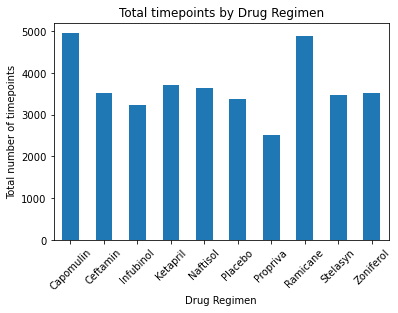

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice 
# tested for each drug regimen using Pandas.
#%matplotlib notebook

timepoint_df = cleaned_df[['Drug Regimen', 'Timepoint']]
timepoint_chart_data =  timepoint_df.groupby('Drug Regimen')
timepoint_chart_data = pd.DataFrame({'Timepoint Total': timepoint_chart_data['Timepoint'].sum()})
timepoint_chart_data.plot.bar(ylabel = "Total number of timepoints", rot=45, title= "Total timepoints by Drug Regimen", 
                              legend=False)

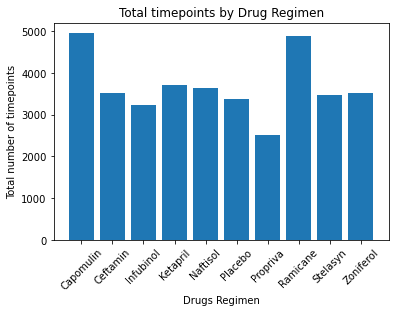

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs_all_list = np.sort(cleaned_df['Drug Regimen'].unique())
drugs_timepoint = timepoint_chart_data['Timepoint Total']
x_axis = np.arange(0, len(drugs_all_list))
plt.bar(x_axis, drugs_timepoint, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs_all_list, rotation=45)
plt.xlabel("Drugs Regimen")
plt.ylabel("Total number of timepoints")
plt.title("Total timepoints by Drug Regimen")
plt.show()


<AxesSubplot:ylabel='Mouse by Gender'>

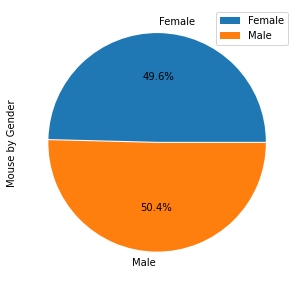

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Removing mice with duplicate timepoint
for i in dupl_data:
    mouse_gender_df = mouse_metadata.loc[(mouse_metadata['Mouse ID'] != i), :]
# mouse_gender_df
mouse_gender_group = mouse_gender_df.groupby('Sex')
mouse_gender_group = pd.DataFrame({'Mouse by Gender': mouse_gender_group['Sex'].count()})
mouse_gender_group.plot.pie(y='Mouse by Gender', figsize=(10, 5), explode=[0.01, 0], autopct="%1.1f%%")

(-1.1139918390460408,
 1.1023390425874355,
 -1.1031907052876488,
 1.1002846440382625)

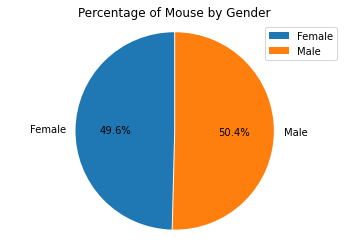

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplo
data = mouse_gender_group['Mouse by Gender']
labels = np.sort(mouse_gender_df['Sex'].unique())
plt.pie(data, explode= [0.01, 0], labels=labels, autopct="%1.1f%%", startangle=90)
plt.legend(loc='best')
plt.title("Percentage of Mouse by Gender")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_limited = combined_df.loc[(combined_df['Drug Regimen'] == 'Capomulin') | (combined_df['Drug Regimen'] == 'Ramicane')
                | (combined_df['Drug Regimen'] == 'Infubinol') |  (combined_df['Drug Regimen'] == 'Ceftamin'), :]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = regimen_limited.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = pd.merge(combined_df, last_timepoint, on='Mouse ID')
new_df = new_df.rename(columns={'Timepoint_y': 'max_timepoint', 'Timepoint_x': 'Timepoint'})
new_df = new_df.loc[(new_df['Timepoint'] == new_df['max_timepoint']), :].reset_index(drop=True)
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,45,22.050126,1,45
1,s185,Capomulin,Female,3,17,45,23.343598,1,45
2,x401,Capomulin,Female,16,15,45,28.484033,0,45
3,m601,Capomulin,Male,22,17,45,28.430964,1,45
4,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3,45
96,y163,Infubinol,Female,17,27,45,67.685569,3,45
97,y769,Ceftamin,Female,6,27,45,68.594745,4,45
98,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = new_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

drug_list = [i for i in treatment_list['Drug Regimen'].unique()]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#     Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    final_tumor_vol = treatment_list.loc[(treatment_list["Drug Regimen"] == drug), 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)

    # Determine outliers using upper and lower bounds
    average = final_tumor_vol.mean()
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = np.round(quartiles[0.25], 4)
    upperq = np.round(quartiles[0.75], 4)
    iqr = np.round((upperq-lowerq), 4)
    print(f"============   {drug.upper()}   ============")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The median of tumor volume is: {np.round(quartiles[0.5], 4)} ")
    print(f"The mean of tumor volume is: {np.round(average, 4)}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {np.round(lower_bound, 4)} could be outliers.")
    print(f"Values above {np.round(upper_bound, 4)} could be outliers.")   
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    if outliers.empty:
        outliers = 'None found'
    print(f"{drug}'s potential outliers: {outliers}")
    print("              ")

============   RAMICANE   ============
The lower quartile of tumor volume is: 31.5605
The upper quartile of tumor volume is: 40.659
The interquartile range of tumor volume is: 9.0985
The median of tumor volume is: 36.5617 
The mean of tumor volume is: 36.1914
Values below 17.9128 could be outliers.
Values above 54.3067 could be outliers.
Ramicane's potential outliers: None found
              
============   CAPOMULIN   ============
The lower quartile of tumor volume is: 32.3774
The upper quartile of tumor volume is: 40.1592
The interquartile range of tumor volume is: 7.7818
The median of tumor volume is: 38.1252 
The mean of tumor volume is: 36.6676
Values below 20.7047 could be outliers.
Values above 51.8319 could be outliers.
Capomulin's potential outliers: None found
              
============   INFUBINOL   ============
The lower quartile of tumor volume is: 54.0486
The upper quartile of tumor volume is: 65.5257
The interquartile range of tumor volume is: 11.4771
The median of tum

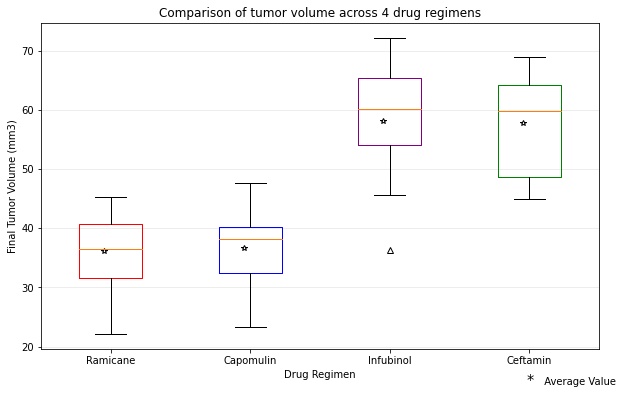

In [15]:
# # # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
colours = ['red', 'blue', 'purple', 'green']
fig, ax = plt.subplots(figsize=(10, 6))
ax.set(title="Comparison of tumor volume across 4 drug regimens", ylabel="Final Tumor Volume (mm3)", 
       xlabel="Drug Regimen")
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
bp = ax.boxplot(tumor_vol_list, labels=drug_list, sym='^')
for b in np.arange(0, len(drug_list)):
    colour = colours[b]
    box = bp['boxes'][b]
    plt.setp(box, color=colour)
    # tumor volume mean
    ax.plot(np.average(box.get_xdata()), np.average(tumor_vol_list[b]), color='w', marker='*', markeredgecolor='k')
                
fig.text(0.8, 0.045, '*', color='black', weight='roman', size='x-large')
fig.text(0.815, 0.043, '  Average Value', color='black', weight='roman', size='medium')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

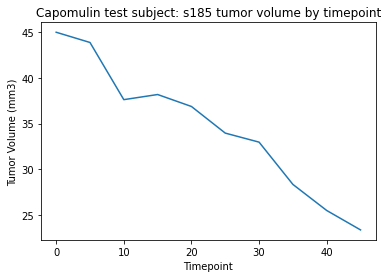

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_df.loc[(combined_df['Drug Regimen'] == 'Capomulin'), :]
capomulin_mouse = capomulin_df['Mouse ID'].reset_index(drop=True)
capomulin_mouse = capomulin_mouse[0]
capomulin_df_one = capomulin_df.loc[(capomulin_df['Mouse ID'] == capomulin_mouse), :]
x_axis = capomulin_df_one['Timepoint']
y_values = capomulin_df_one['Tumor Volume (mm3)']
capomulin_line = plt.plot(x_axis, y_values)
plt.title(f"Capomulin test subject: {capomulin_mouse} tumor volume by timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


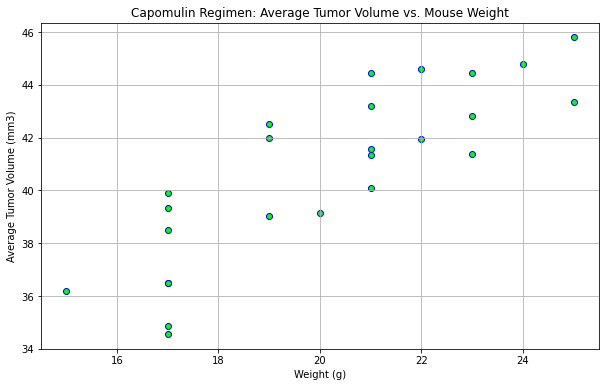

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumorevol_by_weight_df = capomulin_df
tumorevol_by_weight_df = tumorevol_by_weight_df[['Mouse ID','Weight (g)', 'Tumor Volume (mm3)']]
tumorevol_by_weight_df = tumorevol_by_weight_df.sort_values(['Weight (g)'])  
tumorevol_by_weight_df = tumorevol_by_weight_df.groupby(['Weight (g)', 'Mouse ID']).mean()
# tumorevol_by_weight_df = tumorevol_by_weight_df.reset_index()
x_axis = []
data = tumorevol_by_weight_df['Tumor Volume (mm3)']
data = np.array(data)
x_limit = data.max() + 0.5
for i in np.arange(0, len(data)):
    x_axis.append(tumorevol_by_weight_df.index[i][0])
plt.figure(figsize=(10, 6))
plt.scatter(x_axis, data, marker="o", facecolors="lime", edgecolors="blue")
plt.title(f"Capomulin Regimen: Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
plt.show() 

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

avg_tumor_volume = data
mouse_weight = x_axis
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0], 2)}")

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


The r-squared is: 0.7088568047708723


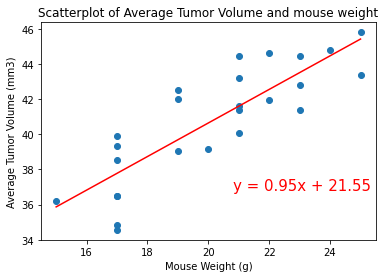

In [19]:
from scipy.stats import linregress

y_values = avg_tumor_volume
x_values = np.array(mouse_weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20.8,36.8),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Scatterplot of Average Tumor Volume and mouse weight')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Conclusion
1. Out of the 10 drug regimens in the study, mice recovers the best with Ramicane and Capomulins. This can be seen in our boxplot where the quartile and interquartile range are both relative low, this calculation is further supported by our line graph over timepoints comparing mice with the smallest tumor volume at timepoint 45 against each drugs. 80% of the drug regimens resulted the mice to have larger tumor volume than at the start.


2. Propriva appears to be the worst drug out of the 10 tested, with the least mice surviving to timepoint 45. 24 mice started off on Propriva by timepoint 45, there was only 7 mice remaining. Surviving at 29.17% compares to 84% for Capomulin Regimens.


3. Correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen are;
       i.   Average Tumor Volume (mm3) = 0.95 x (Mouse Weight (g)) + 21.55   
       ii.  r-squared of 0.7089    
      
    r-squared at 0.7089 suggest moderate effective linear regression model.

## Additional Analysis

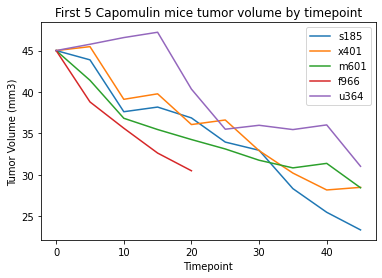

In [20]:
############### Additional analysis #########
# First 5 capumulin mice tumor volume over timepoint
drug_mouse = capomulin_df['Mouse ID'].unique()
maxcount = 5
for m in np.arange(0, maxcount):
    capomulin_mouse = drug_mouse[m]
    capomulin_df_one = capomulin_df.loc[(capomulin_df['Mouse ID'] == capomulin_mouse), :]
    x_axis = capomulin_df_one['Timepoint']
    y_values = capomulin_df_one['Tumor Volume (mm3)']
    capomulin_line = plt.plot(x_axis, y_values, label=capomulin_mouse)
plt.title(f"First {maxcount} Capomulin mice tumor volume by timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")

In [21]:
############### Additional analysis #########
# identifying mice with the smallest tumor volume per drug at timepoint 45
best_recovered_mice = []
min_vol_m = []
# new_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
# best_recovered_mice = best_recovered_mice.groupby('Drug Regimen').min()
for drug in drugs_all_list:
    final_tumor_vol = combined_df.loc[(combined_df["Drug Regimen"] == drug) & (combined_df["Timepoint"] == 45),
                                      'Tumor Volume (mm3)']
    min_vol = final_tumor_vol.min()
    mouse = combined_df.loc[(combined_df["Drug Regimen"] == drug) & (combined_df["Timepoint"] == 45) & 
               (combined_df["Tumor Volume (mm3)"] == min_vol), 'Mouse ID']
    min_vol_m.append(mouse)
best_recovered_mouse = np.array(min_vol_m)

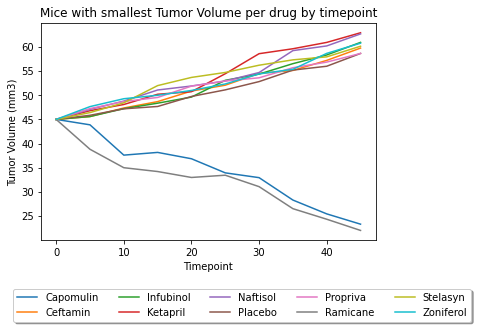

In [22]:
############### Additional analysis ######### 
# Drug comparison on mice with smallest final tumor volume

for m in np.arange(0, len(best_recovered_mouse)):
    specific_mouse = best_recovered_mouse[m][0]
    drug_name = drugs_all_list[m]
    x_axis = combined_df.loc[(combined_df['Mouse ID'] == specific_mouse), 'Timepoint']
    y_values = combined_df.loc[(combined_df['Mouse ID'] == specific_mouse), 'Tumor Volume (mm3)']
    plt.plot(x_axis, y_values, label=drug_name)
plt.title(f"Mice with smallest Tumor Volume per drug by timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best", bbox_to_anchor=(1.3, -0.2), fancybox=True, shadow=True, ncol=5)

In [23]:
############### Additional analysis ######### 
mouse_count_by_drug = cleaned_df.loc[(cleaned_df['Timepoint'] == 0), ['Drug Regimen', 'Mouse ID']]
mouse_count_by_drug = mouse_count_by_drug.groupby('Drug Regimen').count()
print(f"Start count by drugs;")
mouse_count_by_drug

Start count by drugs;


,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


In [24]:
############### Additional analysis #########
mouse_count_by_drug_end = cleaned_df.loc[(cleaned_df['Timepoint'] == 45), ['Drug Regimen', 'Mouse ID']]
mouse_count_by_drug_end = mouse_count_by_drug_end.groupby('Drug Regimen').count()
print(f"End count by drugs;")
mouse_count_by_drug_end

End count by drugs;


,Mouse ID
Drug Regimen,
Capomulin,21
Ceftamin,13
Infubinol,9
Ketapril,11
Naftisol,13
Placebo,11
Propriva,7
Ramicane,20
Stelasyn,11
